<a href="https://colab.research.google.com/github/nachi-hebbar/ARIMA-Temperature_Forecasting/blob/master/Temperature_Forecast_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ARIMA stands for Auto Regressive Integrated Moving Average. There are seasonal and Non-seasonal ARIMA models that can be used for forecasting
Non-Seasonal ARIMA model:
This method has three variables to account for

P = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation) P helps adjust the line that is being fitted to forecast the series
Purely autoregressive models resemble a linear regression where the predictive variables are P number of previous periods

D = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. D refers to the number of differencing transformations required by the time series to get stationary.

Stationary time series is when the mean and variance are constant over time. It is easier to predict when the series is stationary.

Differencing is a method of transforming a non-stationary time series into a stationary one. This is an important step in preparing data to be used in an ARIMA model.

The first differencing value is the difference between the current time period and the previous time period. 

If these values fail to revolve around a constant mean and variance then we find the second differencing using the values of the first differencing. We repeat this until we get a stationary series

The best way to determine whether or not the series is sufficiently differenced is to plot the differenced series and check to see if there is a constant mean and variance.

Q = This variable denotes the lag of the error component, where error component is a part of the time series not explained by trend or seasonality

In [28]:
#!pip install pmdarima

In [1]:
import pandas as pd
import numpy as np

## Read Data

In [15]:
df=pd.read_csv('C:\\Users\\Ajit Wagh\\Desktop\\TimeSeries\\MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [17]:
print(df.index.min())
print(df.index.max())

2014-01-01 00:00:00
2018-12-30 00:00:00


## Plot Your Data

<AxesSubplot:xlabel='DATE'>

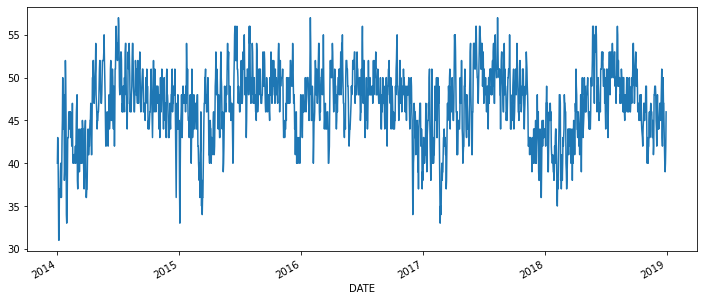

In [3]:
df['AvgTemp'].plot(figsize=(12,5))

## For Stationarity

In [4]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [5]:
adf_test(df['AvgTemp'])

1. ADF :  -6.55468012506878
2. P-Value :  8.67593748019951e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


## Figure Out Order for ARIMA Model

In [6]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
stepwise_fit = auto_arima(df['AvgTemp'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.602
Date:                Thu, 13 May 2021   AIC                           8295.204
Time:                        13:02:03   BIC                           8339.261
Sample:                             0   HQIC                          8311.457
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2877      0.385      3.343      0.001       0.533       2.043
ar.L1          0.9723      0.008    117.243      0.000       0.956       0.989
ma.L1         -0.1199      0.024     -4.988      0.000      -0.167      -0.073
ma.L2         -0.2165      0.024     -8.869      0.000      -0.264      -0.169
ma.L3         -0.2039      0.024     -8.445      0.000      -0.251      -0.157
ma.L4         -0.1334      0.023     -5.811      0.000      -0.178      -0.088
ma.L5         -0.0482      0.025     -1.964      0.050      -0.096      -0.000
sigma2         5.5376      0.175     31.713      0.000       5.195       5.880
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                20.71
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
from statsmodels.tsa.arima_model import ARIMA

## Split Data into Training and Testing

In [9]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


## Train the Model

In [10]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                     ARMA(1, 5)   Log Likelihood               -4070.198
Method:                       css-mle   S.D. of innovations              2.347
Date:                Thu, 13 May 2021   AIC                           8156.395
Time:                        13:02:04   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5857      0.785     59.355      0.000      45.047      48.124
ar.L1.AvgTemp     0.9856      0.007    150.630      0.000       0.973       0.998
ma.L1.AvgTemp    -0.1412      0.025     -5.735      0.000      -0.190      -0.093
ma.L2.AvgTemp    -0.2268      0.024     -9.295      0.000      -0.275      -0.179
ma.L3.AvgTemp    -0.2168      0.026     -8.416      0.000      -0.267      -0.166
ma.L4.AvgTemp    -0.1479      0.023     -6.300      0.000      -0.194      -0.102
ma.L5.AvgTemp    -0.0594      0.025     -2.411      0.016      -0.108      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0146           +0.0000j            1.0146            0.0000
MA.1            1.0883           -0.0000j            1.0883           -0.0000
MA.2            0.0555           -1.8423j            1.8431           -0.2452
MA.3            0.0555           +1.8423j            1.8431            0.2452
MA.4           -1.8432           -1.0734j            2.1330           -0.4161
MA.5           -1.8432           +1.0734j            2.1330            0.4161
-----------------------------------------------------------------------------
"""

## Make Predictions on Test Set

<AxesSubplot:xlabel='DATE'>

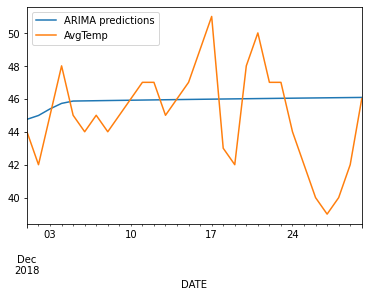

In [11]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

<AxesSubplot:xlabel='DATE'>

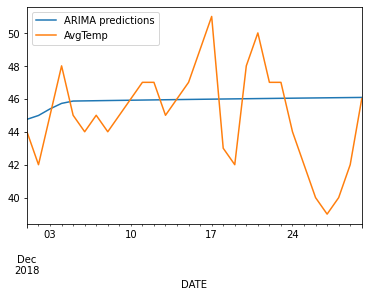

In [20]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)

In [21]:
test['AvgTemp'].mean()

45.0

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.0004990059719967


In [23]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


## For Future Dates

In [25]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.418063
2018-12-31    46.113781
2019-01-01    45.617770
2019-01-02    45.249554
2019-01-03    45.116983
2019-01-04    45.136770
2019-01-05    45.156279
2019-01-06    45.175515
2019-01-07    45.194482
2019-01-08    45.213183
2019-01-09    45.231622
2019-01-10    45.249802
2019-01-11    45.267728
2019-01-12    45.285403
2019-01-13    45.302830
2019-01-14    45.320013
2019-01-15    45.336955
2019-01-16    45.353660
2019-01-17    45.370131
2019-01-18    45.386371
2019-01-19    45.402384
2019-01-20    45.418172
2019-01-21    45.433739
2019-01-22    45.449088
2019-01-23    45.464222
2019-01-24    45.479144
2019-01-25    45.493857
2019-01-26    45.508363
2019-01-27    45.522667
2019-01-28    45.536770
2019-01-29    45.550676
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

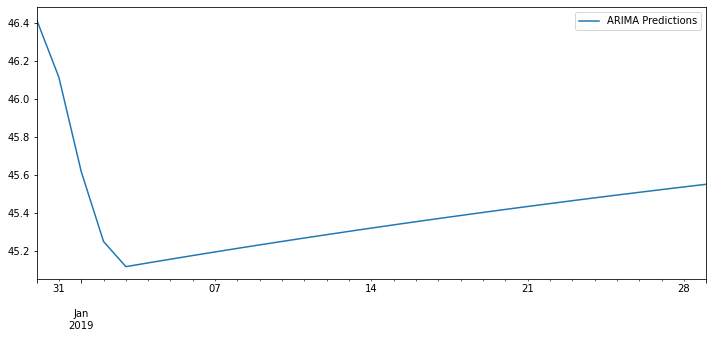

In [27]:
pred.plot(figsize=(12,5),legend=True)